# Capstone Project - Car Accident Severity
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

Reducing traffic accidents is an **important public safety challenge**. Accident prediction is important for optimizing public transportation, enabling safer routes, and cost-effectively improving the transportation infrastructure, all in order to make the roads safer. 


This project is focusing on predicting the accident severity based on different attributes like **locations, weather, road and visibility conditions**, cause of different vehicles, collision due to inattention, rough driving by influence of drugs or alcohol and so on.

In an effort to avoid and reduce the frequency of these type of accidents, we will build a model to predict the severity of an accident given the weather, the road, the light conditions and whether or not a driver involved was under the influence of drugs or alcohol. This way we would be able to bring awareness to the drivers and warn people about the possibility of getting into a car accident and its severity if it happens. This way people would drive more carefully or even change the travel if able to.

We will use our data science powers to be answered that how severe would be the accident if it happens by knowing the **weather, road and visibility conditions.**

## Data <a name="data"></a>

We have collected the raw data from SDOT Traffic Management Division, Traffic Records Group and contains data of all types of collisions that happened in Seattle city from 2004 to May/2020.



The data contains 194,673 samples and have 37 features. Since we would like to identify the factors that cause the accident and the level of severity, we will use SEVERITYCODE as our dependent variable Y, and try different combinations of independent variables X to get the result. Since the observations are quite large, we may need to filter out the missing value and delete the unrelated columns first. Then we can select the factor which may have more impact on the accidents, such as weather, road condition, light condition, collision type and either driver was involved by influencing drugs or alcohol.

Let’s have a look on the data and understand better how to find the answer to this problem.

In [1]:
# Import the data
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_942a8af80cad40b8af9dc322124b7978 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='LKnsL16S9dZYYpqIGIf4c0dCLoAtXhyZQoi8Ly3QgT0R',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.ap-geo.objectstorage.service.networklayer.com')

body = client_942a8af80cad40b8af9dc322124b7978.get_object(Bucket='applieddatasciencecapstone-donotdelete-pr-kexycgmwsxvsmw',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [2]:
# Shape of the data
print('Samples:', df.shape[0])
print('Features:', df.shape[1])

Samples: 194673
Features: 38


In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Check for number of  missing values

In [4]:
df.isna().sum().to_frame().rename(columns={0:'NaN Count'})

,NaN Count
SEVERITYCODE,0
X,5334
Y,5334
OBJECTID,0
INCKEY,0
COLDETKEY,0
REPORTNO,0
STATUS,0
ADDRTYPE,1926
INTKEY,129603


There are missing values on part of the data, some features have over 40% of missing data for that we will not consider them to our model. Removing the irrelevant data attributes away, the variables we will use to classify the severity of the accidents are:

* COLLISIONTYPE: Collision type
* WEATHER: Weather conditions during the time of the collision
* ROADCOND: The condition of the road during the collision
* LIGHTCOND: The light conditions during the collision
* UNDERINFL: Whether or not a driver involved was under the influence of drugs or alcohol

These features contains missing values but its below 3% of the total amount of samples.

#### Target Variable

Our target variable SEVERITYCODE that corresponds to the severity of the collision:

* **Property Damage Only Collision** which is the same as not injured coliision
* **Injury Collision** which is a binary classification problem

In [5]:
# Check the values for each SEVERITYCODE
df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


In [6]:
# Check the values for each SEVERITYDESC
df['SEVERITYDESC'].value_counts().to_frame()

,SEVERITYDESC
Property Damage Only Collision,136485
Injury Collision,58188


(array([0, 1]), <a list of 2 Text xticklabel objects>)

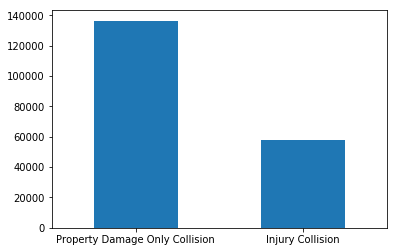

In [7]:
# Plot the bar chart to check the differences between the values of SEVERITYDESC
df['SEVERITYDESC'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)

#### Annual amount of traffic incidents in Seattle

We have noticed that there is a considerably high amount of incidents only discrepancy is from 2020 as it was recorded incidents that occured till May/2020 not a whole year like the others. We can also infer from the plots that no injury collisions are always more likely to happen.

Text(0.5, 1.0, 'Annual traffic incidents in Seattle by Severity')

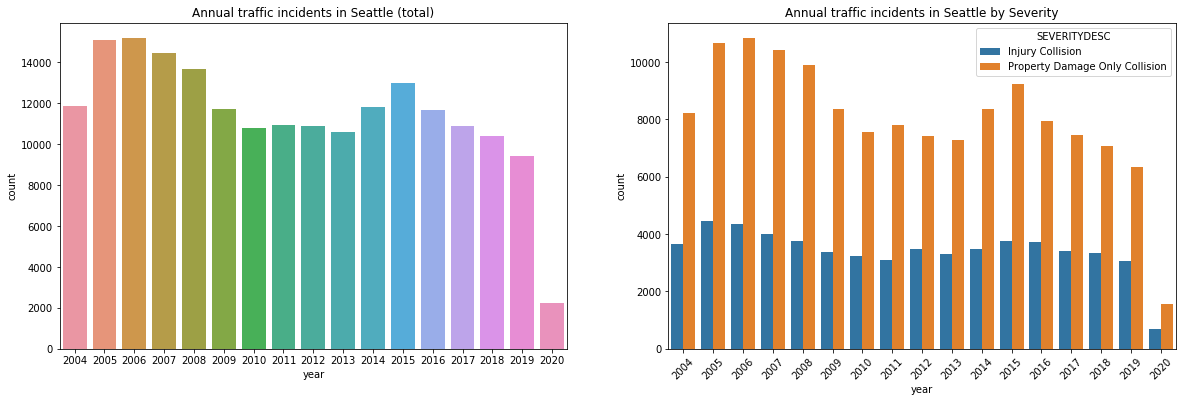

In [8]:
# Bar chart visualizatin of annual amount of traffic incidents in Seattle

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 6))

df['year'] = pd.DatetimeIndex(df['INCDATE']).year
df['year'].value_counts().sort_index()#.plot(kind='bar')
sns.countplot(x="year", data=df, ax=ax1)
sns.countplot(x="year", hue="SEVERITYDESC", data=df, ax=ax2)
plt.xticks(rotation=45)
ax1.set_title('Annual traffic incidents in Seattle (total)')
ax2.set_title('Annual traffic incidents in Seattle by Severity')

#### Collision Type
There is a considerable difference on the collision occurences according to collision types. The most three recurrent accidents were with parked cars, angles and rear ended. Other type of collision is also a matter of concern.

In [9]:
# Value counts of collision type
df['COLLISIONTYPE'].value_counts().sort_values(ascending=False).to_frame()

,COLLISIONTYPE
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956
Head On,2024


Text(0.5, 1.0, 'Collision Type Occurance')

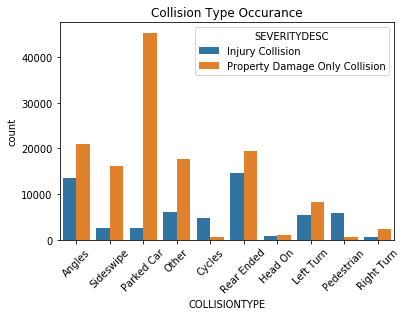

In [10]:
sns.countplot(x="COLLISIONTYPE", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)
plt.title('Collision Type Occurance')

#### Weather Condition
Considering Seattle weather conditions, we notice most incidents happened in a Clear weather. That could be because drivers are less careful when there is no harsh weather condition. It would be interesting to check the correlation between WEATHER and INATTENTIONIND (whether or not collision was due to inattention), but there are too many missing values, 85% of the data is missing.

In [11]:
# Value counts of Weather Condition
df['WEATHER'].value_counts().sort_values(ascending=False).to_frame()

,WEATHER
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

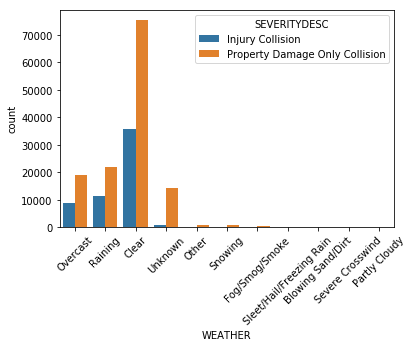

In [12]:
sns.countplot(x="WEATHER", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

#### Road Condition
Considering the road condition we have found that there were more occurences happened in dry road condition.

In [13]:
# Value counts of Road Condition
df['ROADCOND'].value_counts().sort_values(ascending=False).to_frame()

,ROADCOND
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

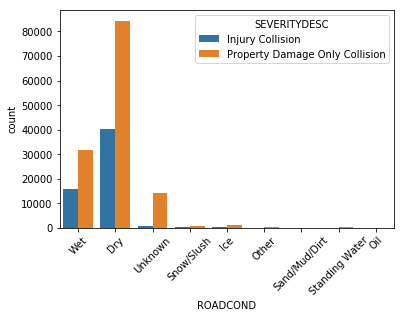

In [14]:
sns.countplot(x="ROADCOND", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

#### Light Condition
Most of the accidents happend in Daylight whereas Dark-Streer Lights On is also considerable for accident. 

In [15]:
# Value counts of Light Condition
df['LIGHTCOND'].value_counts().sort_values(ascending=False).to_frame()

,LIGHTCOND
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

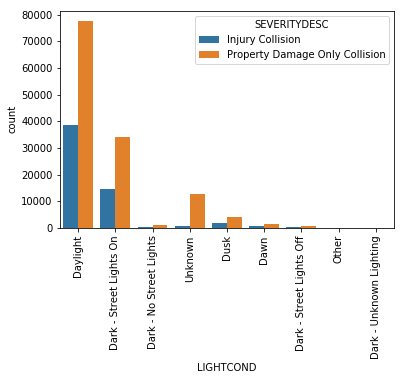

In [16]:
sns.countplot(x="LIGHTCOND", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=90)

#### Driver under influence of drugs or alcohol
It has been seen that drivers were not under any influence in most the incidents.

In [17]:
# Value counts for either drivers were influenced of drugs or alcohol
df['UNDERINFL'].value_counts().sort_values(ascending=False).to_frame()

,UNDERINFL
N,100274
0,80394
Y,5126
1,3995


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

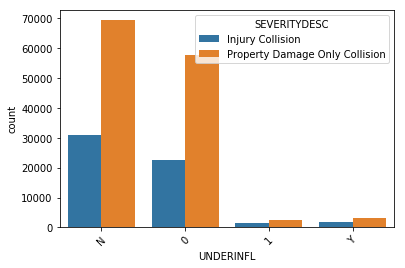

In [18]:
sns.countplot(x="UNDERINFL", hue="SEVERITYDESC", data=df)
plt.xticks(rotation=45)

Each feature have a different weight of influence on the severity of the collision. Overall, all of them are consistently infering that no-injury accidents in normal driving conditions are more recurrent.

We will use **COLLISIONTYPE, WEATHER, ROADCOND, LIGHTCOND and UNDERINFL** as attributes to classify **SEVERITYCODE**. For that we will need to prepare this features so it is suitable for a binary classification model. We will use some popular machine learning algorithms like SVM, Logistic Regression, Naive Bayes and KNN for build up models to analyze their performance and predict the collision severity.

## Methodology <a name="methodology"></a>

In this project we will use **COLLISIONTYPE, WEATHER, ROADCOND, LIGHTCOND** and **UNDERINFL** as attributes to classify **SEVERITYCODE**. We will limit our analysis to this four independent variables. For that we will need to prepare this features so it is suitable for a binary classification model.

In the first step we will prepare and clean the dataset to make it readable and suitable for the machine learning algorithms. There are 37 attributes whereas we will consider the features of COLLISIONTYPE, WEATHER, ROADCOND, LIGHTCOND and UNDERINFL to classify SEVERITYCODE. Those attributes has 3% missing data which we will drop them. We will split this dataset as train and test split whereas 70% to train the model and 30% to test the model.

Second step in our analysis will be calculation and exploration of different models to find out the main problem for severity. We will use 3 classification models which are Logistic Regression, Decision Tree an KNN. After obtaining each model's predictions we will evaluate their accuracy, precison, f1-score, log-loss and compare and discuss the results.

## Analysis <a name="analysis"></a>

### 1. Data Preparation and Cleaning
#### Dropping all the irrelevant variables and attributes and dealing with missing values

In [19]:
# Seperate the attributes for working 
data = df[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL', 'SEVERITYCODE']]

# Dropping the missing values
data = data.dropna()
data.shape

(189316, 6)

In [20]:
data.head()

,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL,SEVERITYCODE
0,Angles,Overcast,Wet,Daylight,N,2
1,Sideswipe,Raining,Wet,Dark - Street Lights On,0,1
2,Parked Car,Overcast,Dry,Daylight,0,1
3,Other,Clear,Dry,Daylight,N,1
4,Angles,Raining,Wet,Daylight,0,2


In [21]:
data.dtypes

COLLISIONTYPE    object
WEATHER          object
ROADCOND         object
LIGHTCOND        object
UNDERINFL        object
SEVERITYCODE      int64
dtype: object

#### Convert categorical features to numerical values

In [22]:
data['UNDERINFL'].replace(to_replace=['N','Y','0'], value=[0,1,0],inplace=True)
data['UNDERINFL'].value_counts()

0    180219
1      9097
Name: UNDERINFL, dtype: int64

#### Use label encoding technique to convert categorical varables to binary variables and append them to the feature data frame

In [23]:
from sklearn.preprocessing import LabelEncoder

features = data[['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'UNDERINFL']]

for feature in ['COLLISIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']:
    features[feature] = features[feature].astype('|S') 
    features[feature] = LabelEncoder().fit_transform(features[feature])

features.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
0,0,4,8,5,0
1,9,6,8,2,0
2,5,4,0,5,0
3,4,1,0,5,0
4,0,6,8,5,0


In [24]:
X = features
y = data['SEVERITYCODE'].values

#### Train/Test split and data normalization

In this stage we are going to separate the independent variables to a dataset and dependent variable 'SEVERITYCODE' to another dataset. After that use this data to randomly pick samples and split in below ratio:

* 70% to train my model
* 30% to test my model Following the split 

In last we will normalize all data to make sure the features are on a similar scale.

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
X_train.head()

Train set: (132521, 5) (132521,)
Test set: (56795, 5) (56795,)


,COLLISIONTYPE,WEATHER,ROADCOND,LIGHTCOND,UNDERINFL
109717,0,1,0,5,0
9615,7,1,0,5,0
133991,3,1,0,5,0
76012,5,1,0,5,0
97913,9,10,7,8,0


#### Normalize Data

Data Standardization give data zero mean and unit variance

In [28]:
from sklearn import preprocessing

X= preprocessing.StandardScaler().fit(X).transform(X)
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_train[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[-1.61912844, -0.73134642, -0.71271201,  0.34994386, -0.22445149],
       [ 0.89451881, -0.73134642, -0.71271201,  0.34994386, -0.22445149],
       [-0.54185105, -0.73134642, -0.71271201,  0.34994386, -0.22445149],
       [ 0.17633388, -0.73134642, -0.71271201,  0.34994386, -0.22445149],
       [ 1.61270374,  2.42056287,  1.20397855,  2.10157091, -0.22445149]])

In [29]:
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_test[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[ 0.90028023, -0.72579269, -0.71028447, -1.39919831, -0.22518559],
       [-1.61258466, -0.72579269, -0.71028447,  0.35042853, -0.22518559],
       [ 0.18231884, -0.72579269, -0.71028447, -1.39919831, -0.22518559],
       [ 0.90028023,  0.32670431, -0.71028447,  0.93363748, -0.22518559],
       [-1.61258466, -0.72579269, -0.71028447,  0.35042853, -0.22518559]])

### 2. Classification: Modeling and Evaluation

#### K Nearest Neighbor (KNN)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

#Train model and predict
model_knn = KNeighborsClassifier(n_neighbors = 2).fit(X_train, y_train)
model_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

#### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(C=0.0001, solver='liblinear')
model_lr.fit(X_train, y_train)
model_lr

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### Decision Tree

In [32]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
model_tree.fit(X_train, y_train)
model_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Model Evaluation using Test set

In [33]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
import time
from sklearn.metrics import accuracy_score, log_loss, classification_report
from sklearn.metrics import recall_score, roc_curve

In [34]:
import numpy as np
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

In [35]:
# KNN
yhat = model_knn.predict(X_test)
yhat_knn = yhat
print("Train set KNN Accuracy: ", metrics.accuracy_score(y_train, model_knn.predict(X_train)))
print("Test set KNN Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set KNN Accuracy:  0.7111778510575683
Test set KNN Accuracy:  0.7363676379963024


In [37]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    model_knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=model_knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.7127564 , 0.73636764, 0.71529184, 0.73501188, 0.72018664,
       0.7340611 , 0.71108372, 0.72347918, 0.71680606])

#### Plot model accuracy for different number of neighbors

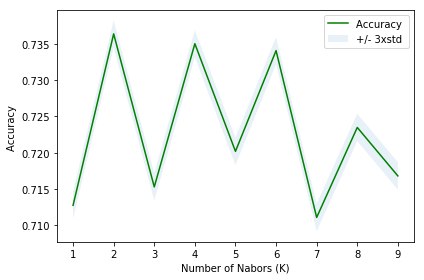

The best accuracy was with 0.7363676379963024 with k= 2


In [38]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

In [39]:
jaccard = jaccard_similarity_score(y_test, yhat)
f1_score_knn = f1_score(y_test, yhat, average='weighted')
precision_knn = precision_score(y_test, yhat, average='weighted')
knn_report = ['KNN', round(jaccard,2), round(f1_score_knn,2), round(precision_knn,2)]

In [40]:
# Decission tree 
yhat = model_tree.predict(X_test)
yhat_tree = yhat
print("Train set Decission Tree Accuracy: ", metrics.accuracy_score(y_train, model_tree.predict(X_train)))
print("Test set Decission Tree Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Decission Tree Accuracy:  0.7479191977120607
Test set Decission Tree Accuracy:  0.7483581301170877


In [41]:
# Train the model with different max depth ranging from 1 to 10
md = 10
mean_acc = np.zeros((md-1))
std_acc = np.zeros((md-1))
ConfustionMx = [];
for n in range(1,md):
    
    #Train Model and Predict  
    model_tree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=model_tree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.69912844, 0.70520292, 0.7482877 , 0.74835813, 0.74885113,
       0.74890395, 0.74846377, 0.74809402, 0.74848138])

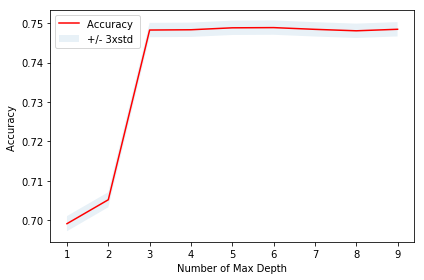

In [42]:
# Plot model accuracy for different number of max depth
plt.plot(range(1,md),mean_acc,'r')
plt.fill_between(range(1,md),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Max Depth')
plt.tight_layout()
plt.show()

In [44]:
jaccard = jaccard_similarity_score(y_test, yhat)
f1_score_tree = f1_score(y_test, yhat, average='weighted')
precision_tree = precision_score(y_test, yhat, average='weighted')
tree_report = ['Decision Tree', round(jaccard,2), round(f1_score_tree,2), round(precision_tree,2)]

In [45]:
# Logistic regression
yhat_proba = model_lr.predict_proba(X_test)
yhat = model_lr.predict(X_test)
yhat_lr = yhat
print("Train set Logistic regression Accuracy: ", metrics.accuracy_score(y_train, model_lr.predict(X_train)))
print("Test set Logistic regression Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Logistic regression Accuracy:  0.6989156435583794
Test set Logistic regression Accuracy:  0.6997799102033629


In [46]:
jaccard = jaccard_similarity_score(y_test, yhat)
f1_score_lr = f1_score(y_test, yhat, average='weighted')
precision_lr = precision_score(y_test, yhat, average='weighted')
lr_report = ['Logistic Regression', round(jaccard,2), round(f1_score_lr,2), round(precision_lr,2)]

In [47]:
report = pd.DataFrame(data=np.array([knn_report, tree_report, lr_report]), 
                      columns=['Algorithm', 'Jaccard', 'F1-score', 'Precision'])
report

,Algorithm,Jaccard,F1-score,Precision
0,KNN,0.72,0.7,0.69
1,Decision Tree,0.75,0.69,0.77
2,Logistic Regression,0.7,0.58,0.68


Among all three models, Jaccard score's measures accuracy is above 70%. The highest accuracy model is the Decision Tree Classifier. The same model also presents the best F1_score and Recall(True positive rate).

In [35]:
from sklearn.metrics import confusion_matrix

print('KNN Confusion Matrix')
tn, fp, fn, tp = confusion_matrix(y_test, yhat_knn).ravel()
(tn, fp, fn, tp)

KNN Confusion Matrix


(38708, 999, 13974, 3114)

In [36]:
print('Decision Tree Confusion Matrix')
tn, fp, fn, tp = confusion_matrix(y_test, yhat_tree).ravel()
(tn, fp, fn, tp)

Decision Tree Confusion Matrix


(39170, 537, 13755, 3333)

In [37]:
print('Logistic Regression Confusion Matrix')
tn, fp, fn, tp = confusion_matrix(y_test, yhat_lr).ravel()
(tn, fp, fn, tp)

Logistic Regression Confusion Matrix


(39655, 52, 16999, 89)

From the Confusion Matrixes we can see also exactly the amount of samples that were classified rightfully and wrongfully. Its noticable the variation jump that happens when comparing false positives and true positives while true negatives and false negatives are quite stable.

## Results and Discussion <a name="results"></a>

In this analysis we evaluated the performance of 3 machine learning algorithms on the Seattle Collision dataset to predict the severity of an accident knowing the weather and road conditions.

The three models performed very similary, but Decision Tree stood out with a difference from KNN and Logistic Regression during the evaluation with the model's accuracy.


## Conclusion <a name="conclusion"></a>

Purpose of this project was to analyze the relationship between severity of an accident and some characteristics which describe the situation that involved the accident. We picked 5 features out of 37 where it showed to be a reasonable choice to find the answer that were searcing for. It was able to achieve 77% accuracy however there were still significant variances that could not be predicted by the models in this study. Those 5 features have somewhat impact on whether or not travel could result in property damage (class 1) or injury (class 2).